In [14]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [15]:
root_dir = '/Users/kessapassa/OneDrive/research_log/20190114/'

In [16]:
dir_list = ['people10000', 'people20000', 'people30000']
seed_list = [str(123 + i) for i in range(3)]
csv_list = ['od']
area_list = [str(i) for i in range(81)]
col_names = [ 'c{0:02d}'.format(i) for i in range(30)]

In [57]:
csv_array = {}
for _dir in dir_list:
    csv_array[_dir] = {}
    for _seed in seed_list:
        csv_array[_dir][_seed] = {}
        for _csv in csv_list:
            df = pd.read_csv(root_dir + 'Origin/' + _dir + 'seed' + _seed + '_' + _csv + '.csv',
                                                names=col_names,
                                                encoding='Shift_JISx0213')
            df.replace(' ', np.NaN, inplace=True)
            df.dropna(how='all', axis=1, inplace=True)
            df = df.applymap(lambda x: (x.split('(census)')[0]) if (type(x) is str) and ('(census)' in x) else x)
            csv_array[_dir][_seed][_csv] = df

In [58]:
road_to_area = {}
def create_road_to_area(road, area):
    road_to_area[road] = float(area)
    
for _dir in dir_list:
    for _seed in seed_list:
        for _csv in ['census']:
            df = pd.read_csv(root_dir + 'include_area_-1/' + _dir + 'seed' + _seed + '_' + _csv + '.csv',
                                                encoding='Shift_JISx0213')
            df = df.loc[:, ['road', 'area']]
            for row in np.asanyarray(df):
                create_road_to_area(row[0], row[1])
road_to_area[np.nan] = np.nan

In [59]:
# df = df.dropna(how='all')
# df = df.applymap(lambda x: road_to_area[x])
# df.head()

In [60]:
dellist = lambda items, indexes: [item for index, item in enumerate(items) if index not in indexes]

def remove_and_fill_none_area(series):
    row = series.values.tolist()
    if -1 in row:
        # -1のindexをリストで取得
        index_list = [i for i, x in enumerate(row) if x == -1]
        # popと同じような原理で削除し横詰め
        row = dellist(row, index_list)
        # 削除した分、ズレが生じるので最後尾に消した数のNaNを追加
        row.extend([np.nan for i in range(len(index_list))])
        
        return pd.Series(row, index=series.index)
    else:
        return series

In [61]:
# df['count'] = df.T.apply(lambda x: x.count())
# df = df.sort_values(['count'], ascending=False)
# df.reset_index(drop=True, inplace=True)
# df.head()

In [62]:
for _dir in dir_list:
    for _seed in seed_list:
        for _csv in csv_list:
            df = csv_array[_dir][_seed][_csv].copy()
            df = df.iloc[:, 3:]
            df = df.dropna(how='all')
            df = df.applymap(lambda x: road_to_area[x])
            dfT = df.T
            dfT = dfT.apply(remove_and_fill_none_area)
            df = dfT.T
            df.reset_index(drop=True, inplace=True)
            csv_array[_dir][_seed][_csv] = df
#             df.to_csv(root_dir + 'converted_road_to_area_od/' + _dir + 'seed' + _seed + _csv + '.csv', index=False)

In [10]:
def create_next_move_area(df, area):
    area = float(area)
    df_area = pd.DataFrame(np.zeros((81, 2)), columns=['area', 'people'])
    df_area['area'] = [float(i) for i in range(81)]
    
    for row in df.values.tolist():
        if area in row:
            index = row.index(area)
            if (len(row) > index+1) and (not np.isnan(row[index+1])):
                df_area.loc[df_area['area'] == row[index+1], 'people'] += 1
                    
    return df_area

In [11]:
move_array = {}
for _dir in dir_list:
    move_array[_dir] = {}
    for _seed in seed_list:
        move_array[_dir][_seed] = {}
        for _csv in csv_list:
            move_array[_dir][_seed][_csv] = {}
            df = csv_array[_dir][_seed][_csv].copy()
            
            for _area in area_list:
                df_area = create_next_move_area(df, _area)
#                 df_area.to_csv(root_dir + 'next_move_area_od/' + _dir + 'seed' + _seed + '_' + _csv + _area + '.csv', index=False)
                move_array[_dir][_seed][_csv][_area] = df_area
            print(_dir + 'seed' + _seed + '_' + _csv)

people10000seed123_od
people10000seed124_od
people10000seed125_od
people20000seed123_od
people20000seed124_od
people20000seed125_od
people30000seed123_od
people30000seed124_od
people30000seed125_od


In [26]:
def create_2d(df):
    df_base = pd.DataFrame(np.zeros((81, 2)), columns=['area', 'people'])
    df_base['area'] = [i for i in range(81)]

    for row in df.values.tolist():
        row = [x for x in row if not np.isnan(x)]
        for r in row:
            df_base.loc[r, 'people'] += 1
            
    return df_base

In [27]:
csv_array_2d = {}
for _dir in dir_list:
    csv_array_2d[_dir] = {}
    for _seed in seed_list:
        csv_array_2d[_dir][_seed] = {}
        for _csv in csv_list:
            df = csv_array[_dir][_seed][_csv].copy()
            df = create_2d(df)
            csv_array_2d[_dir][_seed][_csv] = df
#             df.to_csv(root_dir + 'OD_2D/' + _dir + 'seed' + _seed + _csv + '.csv')

KeyboardInterrupt: 

In [17]:
df = pd.read_csv(root_dir + 'OD_2D/' + 'people30000' + 'seed' + '123' + 'od' + '.csv',
                            index_col=0)
df_new = pd.DataFrame()
for i in range(9):
    tmp = df.loc[i*9:i*9+8, 'people']
    tmp.reset_index(drop=True, inplace=True)
    df_new = pd.concat([df_new, tmp], axis=1)
    
df_new = df_new.T
df_new.columns=(['{0:02d}'.format(i*10) for i in range(9)])
df_new.index=([str(i) for i in range(9)])
df_new = df_new.sort_index(ascending=False)
df_new

,00,10,20,30,40,50,60,70,80
8,0.0,0.0,0.0,13.0,294.0,28.0,30.0,686.0,0.0
7,0.0,0.0,109.0,178.0,6.0,111.0,1133.0,4.0,0.0
6,0.0,0.0,160.0,309.0,3231.0,954.0,475.0,0.0,0.0
5,0.0,35.0,330.0,628.0,9266.0,10059.0,5.0,0.0,0.0
4,1.0,127.0,110.0,422.0,15491.0,6059.0,113.0,87.0,0.0
3,0.0,160.0,989.0,2947.0,1618.0,0.0,53.0,0.0,0.0
2,0.0,1315.0,32.0,612.0,106.0,0.0,0.0,0.0,0.0
1,0.0,6.0,33.0,88.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
for _dir in dir_list:
    for _seed in seed_list:
        for _csv in csv_list:
            df = pd.read_csv(root_dir + 'OD_2D/' + _dir + 'seed' + _seed + _csv + '.csv',
                            index_col=0)
            
            df_new = pd.DataFrame()
            for i in range(9):
                tmp = df.loc[i*9:i*9+8, 'people']
                tmp.reset_index(drop=True, inplace=True)
                df_new = pd.concat([df_new, tmp], axis=1)
            
            df_new = df_new.T
            df_new.columns=(['{0:02d}'.format(i*10) for i in range(9)])
            df_new.index=([str(i) for i in range(9)])
#             df_new = df_new.sort_index(ascending=False)
            df = df_new
            print(_dir, _seed)
            print(df.sum().sum())
#             df.to_csv(root_dir + 'OD_3D/' + _dir + 'seed' + _seed + _csv + '.csv', index=False)

people10000 123
20338.0
people10000 124
20303.0
people10000 125
20025.0
people20000 123
40402.0
people20000 124
40123.0
people20000 125
40340.0
people30000 123
58413.0
people30000 124
53596.0
people30000 125
55049.0


In [23]:
csv_array_3d = {}
for _dir in dir_list:
    csv_array_3d[_dir] = {}
    for _seed in seed_list:
        csv_array_3d[_dir][_seed] = {}
        for _csv in csv_list:
            df = pd.read_csv(root_dir + 'OD_3D/' + _dir + 'seed' + _seed + _csv + '.csv')
            csv_array_3d[_dir][_seed][_csv] = df

In [24]:
import seaborn as sns
def create_contour(df):
    plt.figure(figsize=(9,6))
    sns.heatmap(df, annot=True, fmt='.0f', cmap='RdYlGn_r',
               vmax=df.sum().mean(), vmin=0)

58413.0


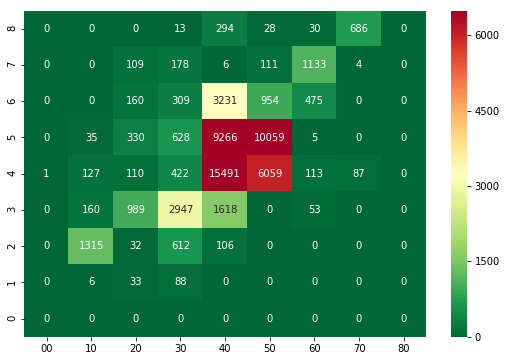

In [63]:
people = 'people30000'
seed = '123'
csv = 'od'
df = csv_array_3d[people][seed][csv].copy()
df = df.sort_index(ascending=False)
print(df.sum().sum())
create_contour(df)

In [30]:
csv_array_2d = {}
for _dir in dir_list:
    csv_array_2d[_dir] = {}
    for _seed in seed_list:
        csv_array_2d[_dir][_seed] = {}
        for _csv in csv_list:
            df = pd.read_csv(root_dir + 'OD_2D/' + _dir + 'seed' + _seed + _csv + '.csv', index_col=0)
            csv_array_2d[_dir][_seed][_csv] = df

In [45]:
def area_to_contour(area_id):
    area_one_length = 9
    area_id = int(area_id)
    left = str(area_id // area_one_length)
    right = str(area_id % area_one_length) + '0'
    return left+right

In [46]:
df = csv_array_2d[people][seed][csv].copy()
df['area'] = df['area'].apply(area_to_contour)
df.sort_values(['people'], ascending=False)

,area,people
40,440,15491.0
50,550,10059.0
49,540,9266.0
41,450,6059.0
58,640,3231.0
30,330,2947.0
31,340,1618.0
19,210,1315.0
69,760,1133.0
29,320,989.0
